# Lecture 4 Exercises

In [20]:
# Don't forget to run this 

import pandas as pd

%matplotlib inline

import seaborn as sns
sns.set('poster')
sns.set_style('whitegrid')

In [21]:
# Exercise 1 - Football stats
#
#
# In this exercise, you will take the mean value of some columns in a dataframe.
# This is done using the following command: 
#
# my_dataframe['column_name'].mean()
#
#
# We ask you to:
# 1 -  Load the csv file in 'Euro2012stats.csv' as a dataframe.
# 2 -  Create a new dataframe, containing only the columns Team, Yellow Cards and Red Cards.
# 3a - Filter teams that scored more than 5 goals, and print the mean of the column Goals.
# 3b - Filter teams that scored exactly   5 goals, and print the mean of the column Goals.
# 3c - Filter teams that scored less than 5 goals, and print the mean of the column Goals.
# 3d - Filter teams that scored either more or less than 5 goals (but not 5),
#      and print the mean of the column Goals.

#################################
# Your code below here

# One way
euro12 = pd.read_csv('Euro2012stats.csv', sep=',')

teams = euro12.filter(['Team', 'Yellow Cards', 'Red Cards', 'Goals'])

print( teams[teams['Goals']  > 5]['Yellow Cards'].mean() )
print( teams[teams['Goals'] == 5]['Yellow Cards'].mean() )
print( teams[teams['Goals']  < 5]['Yellow Cards'].mean() ) 
print( teams[teams['Goals'] != 5]['Yellow Cards'].mean() )
print()

# Another way:
teams = euro12.filter(['Team', 'Yellow Cards', 'Red Cards', 'Goals'])

masks = [ (teams['Goals']>5), (teams['Goals']==5), (teams['Goals']<5), (teams['Goals']!=5) ]

for mask in masks:
    teams2 = teams[mask]
    print( teams2['Yellow Cards'].mean() )

10.75
6.75
6.125
7.666666666666667

10.75
6.75
6.125
7.666666666666667


In [23]:
# Exercise 2: More football stats
#
# We ask you to:
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Create a new column in that dataframe, with the number of letters
#     in the name of each country.
#
# 3 - From that dataframe, create a new dataframe containing only the teams
#     that have more than 10 Yellow Cards OR at least one Red Card.
#
# 4 - Sort that new dataframe, according to the column you created in (2),
#     going from the country with the shortest name to the country with the longest name.
#
# 5 - Iterate through the sorted dataframe, printing the name of every country
#     and its 'Saves-to-shots ratio'.

#################################
# Your code below here

euro12 = pd.read_csv('Euro2012stats.csv', sep=',')

euro12['number of letters'] = [ len(i) for i in euro12['Team'] ]

teams = euro12[ (euro12['Yellow Cards'] > 10) | (euro12['Red Cards']>0) ]

teams = teams.sort_values('number of letters', ascending=True)

for index, row in teams.iterrows():
    print( row['Team'], row['Saves-to-shots ratio'] )

Italy 74.1%
Spain 93.8%
Greece 65.1%
Poland 66.7%
Portugal 71.5%
Republic of Ireland 65.4%


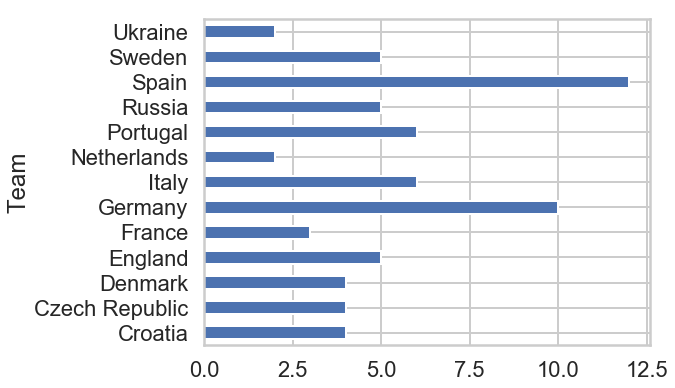

In [25]:
# Exercise 3a: Visualising football stats, part A
#
# For this exercise, you will need two new things:
#
# Here's how to plot a horizontal bar chart:
### my_dataframe['column_name'].plot.barh()
#
# And here's how to change the index of a dataframe to one of its columns:
### my_indexed_dataframe = my_dataframe.set_index('column_name')
#
# With that in mind:
#
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Set the column 'Team' to be its index
#
# 3 - Make a horizontal bar plot of the number of goals per team, 
# but only for the teams that received zero Red Cards.
#
# Tip: increase the figuresize by using the figsize command, as in the lecture notes.

#################################
# Your code below here

euro12     = pd.read_csv('Euro2012stats.csv', sep=',')
euro12_idx = euro12.set_index('Team')

barplot = euro12_idx[ euro12_idx['Red Cards']==0 ]['Goals'].plot.barh(figsize=(8,6))

Text(0, 0.5, 'number of teams')

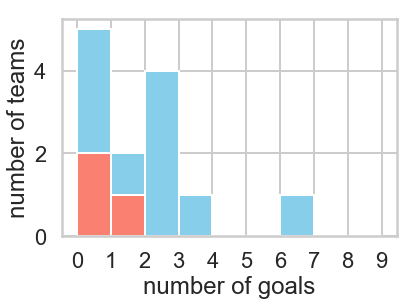

In [26]:
# Exercise 3b: Visualising football stats, part B
#
# To make a histogram, you can use the function presented in the lecture notes:
### my_dataframe['column_name'].hist()
#
# Inside the (), you can put various arguments, listed in the links below:
# - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
# - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# 
# With that in mind:
#
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Make a histogram for the variable 'Hit Woodwork', but only for the teams
# that received zero Red Cards, setting the bins to range(10), and the color to 'skyblue'.
#
# 3 - Make a histogram for the variable 'Hit Woodwork', but only for the teams
#     that received Red Cards, setting the bins to range(10), and the color to 'salmon'.
#
# 4 - Set the ticks on the x axis to range(10) using:
#     my_histogram.set_xticks( range(10)),
#     where my_histogram is the name of your histogram variable.
#
# 5 - Set the xlabel of the histogram to 'number of goals', and
#     the ylabel of the histogram to 'number of teams'.
#
#
#################################
# Your code below here

histogram = euro12[euro12['Red Cards']==0]['Hit Woodwork'].hist( bins=range(10), color='skyblue')
histogram = euro12[euro12['Red Cards']!=0]['Hit Woodwork'].hist( bins=range(10), color='salmon' )

histogram.set_xticks(range(10))
histogram.set_xlabel('number of goals')
histogram.set_ylabel('number of teams')

**Before exercises 4 and 5, first run the code below. But see if you can understand what the code is doing.**

We are going to look which authors comment more or get more likes. Here we have three dictionaries, *comment_count*, *likes_count* and *replies_count*, which have author names as keys, and number of comments, likes and replies as values, respectively. We then make a dataframe based on all that information.

In [28]:
raw_comments = pd.read_csv('IoP18_kpop_comments.tsv', delimiter='\t')

to_filter = ['CommentPublished','CommentTextDisplay','CommentAuthorName',
             'CommentLikeCount','CommentTotalReplyCount','Title']

comments = raw_comments.filter(items=to_filter).dropna()

comment_count = {}
likes_count   = {}
replies_count = {}

for index, row in comments.iterrows():
    
    author = row.CommentAuthorName
    number_of_likes   = int(row.CommentLikeCount)
    number_of_replies = int(row.CommentTotalReplyCount)
    
    # Count comments
    if author not in comment_count:
        comment_count[author]  = 1
    else:
        comment_count[author] += 1
    
    # Count likes
    if author not in likes_count:
        likes_count[author]  = number_of_likes
    else:
        likes_count[author] += number_of_likes
    
    # Count replies
    if author not in replies_count:
        replies_count[author]  = number_of_replies
    else:
        replies_count[author] += number_of_replies


all_authors = comment_count.keys()

data_dict = { 'Author'      :list( all_authors ),
              'CommentCount':list( comment_count.values() ),
              'TotalLikes'  :list( likes_count.values()   ),
              'TotalReplies':list( replies_count.values() ) }

authors = pd.DataFrame(data_dict)

authors.head()

,Author,CommentCount,TotalLikes,TotalReplies
0,Naomi Nicole Yambao,1,0,0
1,Ahmad Farhan Zarin,1,0,0
2,sheridan tulio,1,0,0
3,Seraph Gaming,1,0,0
4,Ashleigh Sharman,1,0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,Author,CommentCount,TotalLikes,TotalReplies
1673,Kim Jong Kai,18,1392,247


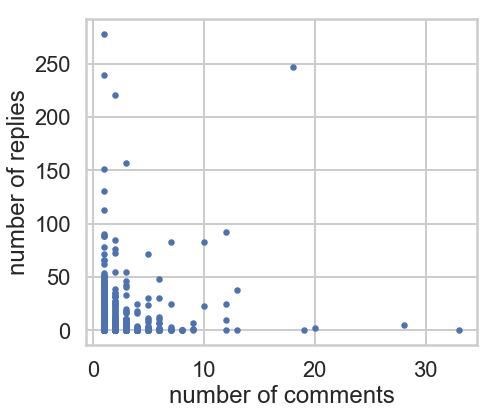

In [29]:
# Exercise 4: Plotting authors
#
# Now that we hava a dataframe containing all authors:
#
# 1 - make a scatter plot with 'CommentCount' in the x axis and 'TotalReplies' in the y axis.
#
# 2 - Set the xlabel of the scatter plot to 'number of comments',
# and the ylabel to 'number of replies'.
#
# 3 - You should find that there is only one Author with over 15 comments and over 200 replies.
# Find the name of that Author by using masks on the dataframe 'authors' and on the variables
# 'CommentCount' and 'TotalReplies' so that you produce a dataframe with a single row,
# containing that Author, as well as their number of comments, likes and replies.
# Finally, display that dataframe using display(that_dataframe).
#
#################################
# Your code below here

scatter_plot = authors.plot.scatter(x='CommentCount', y='TotalReplies', figsize=(7,6))

scatter_plot.set_xlabel('number of comments')
scatter_plot.set_ylabel('number of replies')

single_author = authors[ (authors['CommentCount']>15) & (authors['TotalReplies']>200) ]
display(single_author)

In [30]:
# Exercise 5: Printing full comments
#
# 1 - Sort your dataframe according to 'TotalLikes',
# from the author with most likes to the author with the fewest likes.
#
# 2 - Using the 'comments' dataframe as defined above,
# print all the comments by the author with most likes.

#################################
# Your code below here

display(authors.sort_values('TotalLikes', ascending=False).head())

for i in comments[ comments['CommentAuthorName']=='realistic dreamr' ].CommentTextDisplay:
    print(i,'\n')

,Author,CommentCount,TotalLikes,TotalReplies
4025,realistic dreamr,2,3824,85
2807,Kai,2,2415,221
7053,claire oh,1,2330,131
3517,vin dm,1,2286,66
6225,Alix Malone,3,2111,55


Gosh i just came from watching 'monster', 'call me baby',  and 'overdose' and I cant with my feelings. It's like I love them all so much and it makes me sad that the Exo we see here is not the Exo in 'monster' but at the same time I'm happy. Happy that each of these boys has pursued what they wanted and needed to be happy. I just cant believe that I am as addicted as I was when I started to become interested in them. I am surprised and scared that they (Exo ot9) have SUCH a huge part of my heart. Here's to many more years Exo! Here's to more successes!!! 

I still remember the day I first watched this mv. I was so overwhelmed and taken aback. It's been a wild ride and I'm still here. Love Exo, love anyone who continues to support ot9. 

